# Why convolutions?
## Neuroscientific inspiration


## Computational reasons
1. Sparse computation (compared to full deep networks)
2. Shared parameters (only a small number of shared parameters)
3. Translation invariance

# 1D convolutions, similar but slightly different than signal processing / math convolutions
## (Show on board, x signal, f is filter/kernel)
## [ -1, 1] filter/kernel highlights "sharp points" of signal

Filter
tensor([-1.,  1.])


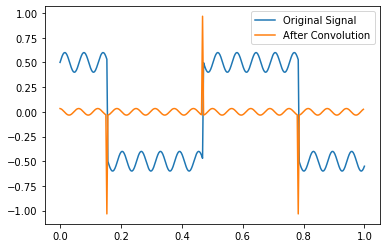

In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(0, 1.0, 300)
x = (torch.cos(10*t) > 0.0).float() + 0.1*torch.sin(100*t)-0.5
plt.plot(t.numpy(), x.numpy(), label='Original Signal')

from torch.nn import functional as F
filt = torch.tensor([-1, 1.0])
print('Filter')
print(filt)
# Should have shape $(m, c, w)$ where m is minibatch size, c is # channels and w is width
y = F.conv1d(x.reshape(1, 1, len(x)), filt.reshape(1, 1, len(filt))).squeeze_()
plt.plot(t.numpy()[:len(y)], y.numpy(), label='After Convolution')
plt.legend()

# Convolutions are linear operators (i.e., matrix multiplication) with shared parameters

In [ ]:
x = torch.randn(10).float().requires_grad_(True)
filt = torch.tensor([-1, 1]).float()
#filt = torch.tensor([1, 2, 3, 4]).float()
y = F.conv1d(x.reshape(1, 1, len(x)), filt.reshape(1, 1, len(filt))).squeeze_()

def extract_jacobian(x, y):
    J = torch.zeros((len(y), len(x))).float()
    for i in range(len(y)):
        v = torch.zeros(len(y)).float()
        v[i] = 1
        if x.grad is not None:
            x.grad.zero_()
        y.backward(v, retain_graph=True)
        J[i, :] = x.grad
    return J

A = extract_jacobian(x, y)
print(A)
y2 = torch.matmul(A, x)
print(y)
print(y2)
print(y-y2)


tensor([[-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])
tensor([ 0.2579,  0.1628,  0.4810, -2.4788,  2.1865, -0.0637, -2.1996,  0.5330,
         1.9802], grad_fn=<AsStridedBackward>)
tensor([ 0.2579,  0.1628,  0.4810, -2.4788,  2.1865, -0.0637, -2.1996,  0.5330,
         1.9802], grad_fn=<MvBackward>)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SubBackward0>)


# 2D convolutions are similar and can be applied to images
## (Show on board, x is 2D image, f is 2D kernel)

## Different filters extract different features from the image

Filter
tensor([[-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.]])
A size torch.Size([427, 640]) B size torch.Size([425, 638])


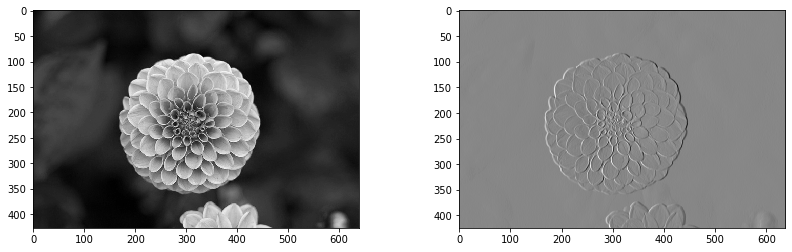

In [ ]:
import sklearn.datasets
A = torch.tensor(sklearn.datasets.load_sample_image('china.jpg')).float()
A = torch.tensor(sklearn.datasets.load_sample_image('flower.jpg')).float()
A = torch.sum(A, dim=2) # Sum channels

filt = torch.tensor([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).float() # Horizontal
#filt = torch.tensor([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).float().t() # Vertical
#filt = torch.tensor([[1, -1], [-1, 1]]).float() # Checker board pattern
#filt = torch.ones((10, 10)).float() # Blur
print('Filter')
print(filt)
B = F.conv2d(A.reshape(1, 1, *A.size()), filt.reshape(1, 1, *filt.size()), padding=1).squeeze()
B = F.conv2d(A.reshape(1, 1, *A.size()), filt.reshape(1, 1, *filt.size())).squeeze()
print('A size', A.size(), 'B size', B.size())

fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].imshow(A.numpy(), cmap='gray')
axes[1].imshow(B.numpy(), cmap='gray')

# Higher dimensional convolutions are similar (i.e., if there is more than 1 channel)
## (Show higher dimensional convolution on board)

torch.Size([3, 427, 640])
Filter
tensor([[[1.]],

        [[0.]],

        [[0.]]])
torch.Size([3, 1, 1])
A size torch.Size([3, 427, 640]) B size torch.Size([427, 640])


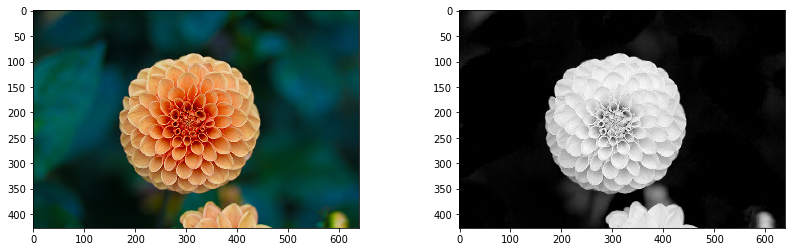

In [ ]:
A = torch.tensor(sklearn.datasets.load_sample_image('flower.jpg')).float()
A = A/255
A = A.permute(2,0,1)
print(A.size())

filt = torch.tensor([1, 0, 0]).reshape(3, 1, 1).float() # Extract red
#filt = torch.tensor([0, 1, 0]).reshape(3, 1, 1).float() # Extract green
#filt = torch.tensor([0, 0, 1]).reshape(3, 1, 1).float() # Extract blue
#filt = torch.ones(3, 5, 5).float() # Blur
#filt = torch.tensor([
#    [[-1, 1]],
#    [[-1, 1]],
#    [[-1, 1]],
#]).float()

print('Filter')
print(filt)
print(filt.size())
B = F.conv2d(A.reshape(1, *A.size()), filt.reshape(1, *filt.size())).squeeze()
print('A size', A.size(), 'B size', B.size())

fig, axes = plt.subplots(1, 2, figsize=(14,4))
axes[0].imshow(A.permute(1,2,0), cmap='gray')
axes[1].imshow(B, cmap='gray')

# How to interpret convolution descriptions (usually)
## Kernel sizes assume all channels (e.g., "1x1 convolution" corresponds to a kernel size of 1x1xC where C is the number of channles)
## The number of filters in the previous layer corresponds to the number of channels in the curent layer

# Why convolutions again?
## Computational reasons
1. Sparse computation (compared to full deep networks)
2. Shared parameters (only a small number of shared parameters)
3. Translation invariance

## Extract image features (edges, etc.)

## Automatically learn image features

# Need several other components for extracting features: Activation functions and pooling layers

# Why activation functions? Activation functions enable non-linear models
## Consider a deep linear network

In [ ]:
torch.manual_seed(0)
A1 = torch.randn((10, 5))
A2 = torch.randn((10, 10))
A3 = torch.randn((1, 10))

x = torch.randn(5)
print('x', x)
y = torch.matmul(A1, x)
y = torch.matmul(A2, y)
y = torch.matmul(A3, y)
print('y', y)

b = torch.matmul(A3, torch.matmul(A2, A1))
y2 = torch.matmul(b, x)
print('y2', y2)

x tensor([ 1.4875, -0.2230, -1.0057, -0.4139,  1.1600])
y tensor([4.1752])
y2 tensor([4.1752])


# If you add activation functions, the deep function cannot be simplified

In [ ]:
torch.manual_seed(0)
A1 = torch.randn((10, 5))
A2 = torch.randn((10, 10))
A3 = torch.randn((1, 10))

x = torch.randn(5)
print('x', x)
y = torch.matmul(A1, x)
y = torch.relu(y)
y = torch.matmul(A2, y)
y = torch.relu(y)
y = torch.matmul(A3, y)
print('y', y)

b = torch.matmul(A3, torch.matmul(A2, A1))
y2 = torch.matmul(b, x)
print('y2', y2)

x tensor([ 1.4875, -0.2230, -1.0057, -0.4139,  1.1600])
y tensor([18.9449])
y2 tensor([4.1752])


# Without ReLU or activation function, the function can only be linear

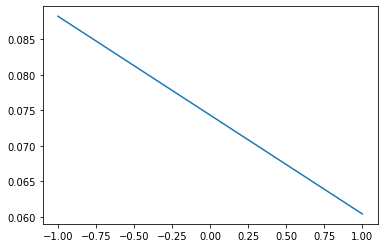

In [ ]:
N, D_in, H, D_out = 64, 1, 10, 1
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Linear(H, D_out),
)
x = torch.linspace(-1, 1).reshape(-1, 1)
y = model(x)
plt.plot(x.detach().numpy(), y.detach().numpy())

# With ReLU activation function, the function is *piecewise* linear

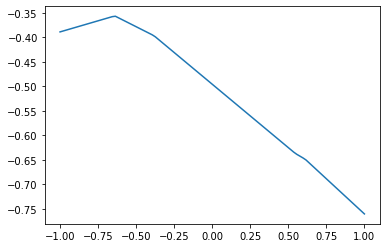

In [ ]:
N, D_in, H, D_out = 64, 1, 10, 1
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
x = torch.linspace(-1, 1).reshape(-1, 1)
y = model(x)
plt.plot(x.detach().numpy(), y.detach().numpy())

# Common activation functions include sigmoid, ReLU, Leaky ReLU, tanh

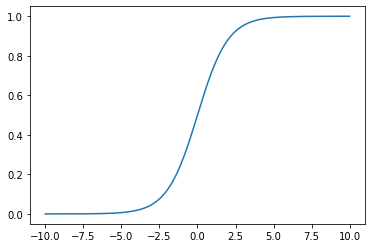

In [ ]:
t = torch.linspace(-10, 10, 300)
plt.plot(t.numpy(), torch.sigmoid(t).numpy())

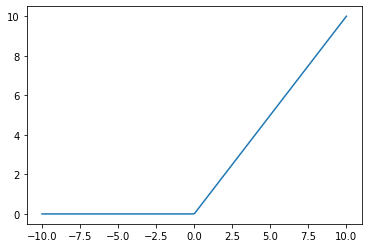

In [ ]:
plt.plot(t.numpy(), F.relu(t).numpy())

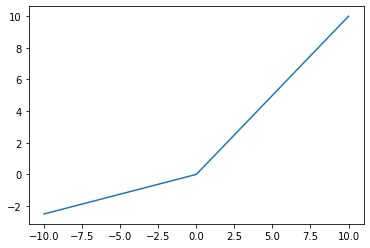

In [ ]:
plt.plot(t.numpy(), F.leaky_relu(t, negative_slope=0.25).numpy())

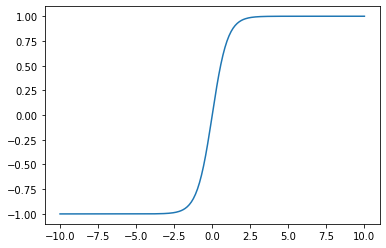

In [ ]:
plt.plot(t.numpy(), torch.tanh(t).numpy())

# Pooling layers are used to reduce dimensionality and introduce some location invariance
## Pooling layers include max pooling and average pooling

In [ ]:
torch.manual_seed(0)
x = torch.randint(10, (10,)).float()
y = F.max_pool1d(x.reshape(1,1,-1), kernel_size=3)
y2 = F.max_pool1d(x.reshape(1,1,-1), kernel_size=3, stride=1)
y3 = F.max_pool1d(x.reshape(1,1,-1), kernel_size=3, stride=1, padding=1)
#y = F.avg_pool1d(x.reshape(1,1,-1), kernel_size=3)
#y2 = F.avg_pool1d(x.reshape(1,1,-1), kernel_size=3, stride=1)
#y3 = F.avg_pool1d(x.reshape(1,1,-1), kernel_size=3, stride=1, padding=1)
print(x)
print(y)
print(y2)
print(y3)

tensor([4., 9., 3., 0., 3., 9., 7., 3., 7., 3.])
tensor([[[9., 9., 7.]]])
tensor([[[9., 9., 3., 9., 9., 9., 7., 7.]]])
tensor([[[9., 9., 9., 3., 9., 9., 9., 7., 7., 7.]]])


# Is average pooling a linear or non-linear operation?

# Is max pooling a linear or non-linear operation?

# Convolution Neural Network (CNN) layers are compositions of convolution, activation and pooling
## (See illustration on slide)

Filter
tensor([[-1.,  0.,  1.],
        [-1.,  0.,  1.],
        [-1.,  0.,  1.]])
A size torch.Size([427, 640]) B size torch.Size([1, 1, 425, 638])


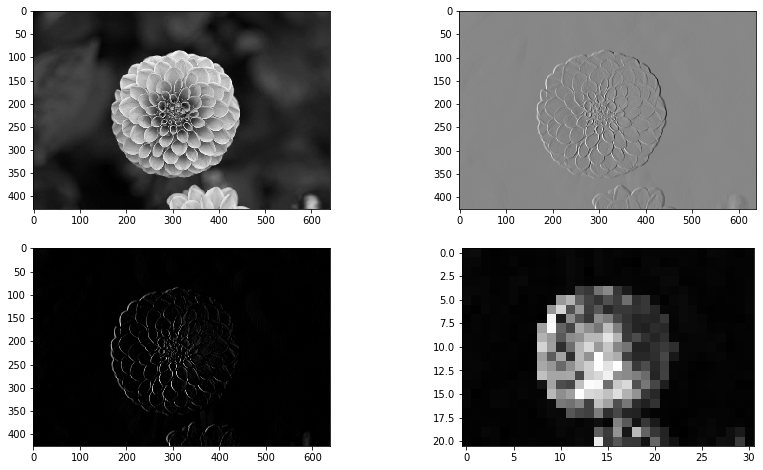

In [ ]:
import sklearn.datasets
A = torch.tensor(sklearn.datasets.load_sample_image('flower.jpg')).float()
A = torch.sum(A, dim=2)
filt = torch.tensor([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).float() # Horizontal
#filt = torch.tensor([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).float().t() # Vertical
#filt = torch.tensor([[1, -1], [-1, 1]]).float() # Checker board pattern
#filt = torch.ones((10, 10)).float() # Blur
print('Filter')
print(filt)
B = F.conv2d(A.reshape(1, 1, *A.size()), filt.reshape(1, 1, *filt.size()))
print('A size', A.size(), 'B size', B.size())
C = torch.relu(B)
D = torch.max_pool2d(C, kernel_size=20)
#D = torch.max_pool2d(C, kernel_size=20, stride=1)

fig, axes = plt.subplots(2, 2, figsize=(14,8))
axes = axes.ravel()
for im, ax in zip([A, B, C, D], axes):
    ax.imshow(im.squeeze(), cmap='gray')

# How could you detect an edge from multiple angles by combining convolutions and ReLUs?
## Hint: First detect edges from all directions, then combine.

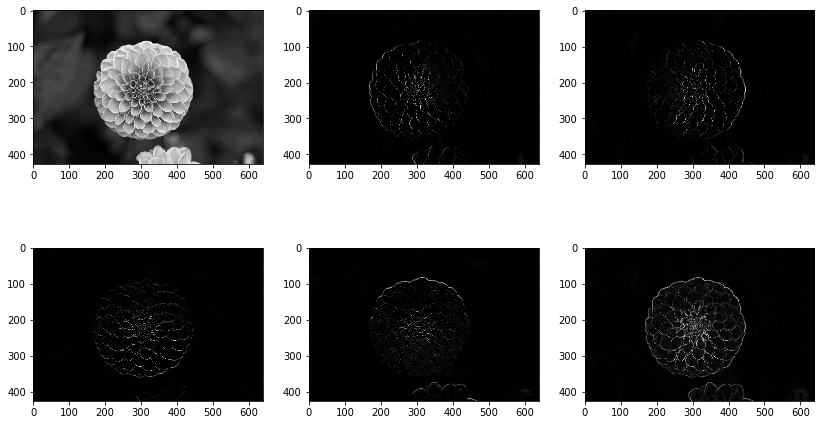

In [ ]:
import sklearn.datasets
import torch
import numpy as np
A = torch.tensor(sklearn.datasets.load_sample_image('china.jpg')).float()
A = torch.tensor(sklearn.datasets.load_sample_image('flower.jpg')).float()
A = torch.sum(A, dim=2)

filters = torch.tensor([
    [[[-1, 1], [-1, 1]]],
    [[[1, -1], [1, -1]]],
    [[[1, 1], [-1, -1]]],
    [[[-1, -1], [1, 1]]],
]).float()
B = F.conv2d(A.reshape(1, 1, *A.size()), filters)
C = torch.relu(B)

# Combine
filt = torch.ones(4).float()
D = F.conv2d(C, filt.reshape(1, 4, 1, 1))

fig, axes = plt.subplots(2, 3, figsize=(14,8))
for im, ax in zip([A, *C[0,:,:,:], D], axes.ravel()):
    ax.imshow(im.squeeze(), cmap='gray')

# Check out PyTorch tutorial on simple classifier on CIFAR10 dataset:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html